In [53]:
import numpy as np
import pandas as pd

from math import log, e
from matplotlib import pyplot as plt

## Exercise 1
a) Sketch decision boundaries

b) Decide winning colour

![](regions.png)

## Exercise 2
$P(Y=\text{black})=0.4$ \& $P(Y=\text{red})=0.6$ 

with class conditionals as multivariate normal distributions with;

$\mu_{\text{black}}=(2,1)$ \& $\mu_{\text{red}}=(4,2)$

and shared covariance matrix;

$\sum = \begin{bmatrix} 3 & -1 \\ -1 & 2 \end{bmatrix}$

a) How to derive Bayes Classifier?

Probability with removal of terms that do not depend on k, meaning comparable function values for a function $g_k$ for each class k;

$g_k(x) = 2 log(\pi_k)-(x-\mu_k)^T\sum^{-1}(x-\mu_k)$

b) Classify point: X1 = 3 and X2 = 1

In [14]:
p_b, p_r = 0.4, 0.6
mu_b, mu_r = np.array([2,1]), np.array([4,2])
covar = np.array([[3,-1],[-1,2]])
x = np.array([3,1])

In [49]:
g_b = lambda x: 2 * log(p_b) - (np.transpose((x-mu_b))) @ (np.linalg.inv(covar)) @ (x-mu_b)
g_r = lambda x: 2 * log(p_r) - (np.transpose((x-mu_r))) @ (np.linalg.inv(covar)) @ (x-mu_r)

def decision(x):
    p_b, p_r = g_b(x), g_r(x)
    if p_b > p_r:
        return 'Black'
    else:
        return 'Red'

post_b = lambda x: e**(-0.5 * np.transpose(x-mu_b) @ np.linalg.inv(covar) @ (x-mu_b))
post_r = lambda x: e**(-0.5 * np.transpose(x-mu_r) @ np.linalg.inv(covar) @ (x-mu_r))

g_b & g_r gives an output, for which we take the one that is the largest and decide that this will be our class

In [51]:
print('Black: ',g_b(x),'\nRed: ' , g_r(x),'\nPrediction: ',decision(x))

Black:  -2.23258146374831 
Red:  -2.4216512475319814 
Prediction:  Black


In [47]:
# Posterior probability within class: p(x|Y=k)
print('Black: ',post_b(x),'\nRed: ' , post_r(x))

Black:  0.8187307530779819 
Red:  0.4965853037914096


c) plot with decision regions

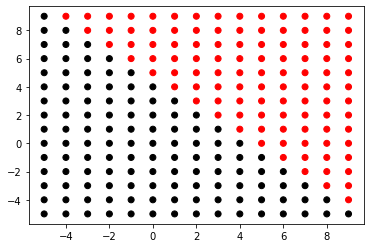

In [85]:
points = []
for i in range(-5,10):
    for j in range(-5,10):
        points.append([i,j])
points = np.array(points)

preds = [decision(x) for x in points]

plt.scatter(points[:,0],points[:,1],c=preds);

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10])